# Bayesian Network

1.   To program in R, either install [R](https://cran.r-project.org/bin/) or [RStudio](https://rstudio.com/products/rstudio/download/)
2.   You may also use Jupyter Notebook to program in R. Follow the steps [here](https://dzone.com/articles/using-r-on-jupyternbspnotebook).
3.   Install the necessary libraries for this program using the command from your R console or R studio: `install.packages(c("bnlearn","xlsx"))`
4.   To visualize the network install another library using the following commands:

```
    if (!requireNamespace("BiocManager", quietly = TRUE))
        install.packages("BiocManager")
    BiocManager::install("Rgraphviz")
```



---



In [ ]:
# load the required library to learn Bayesian Network from the dataset
library(bnlearn)

Warning message:
"package 'bnlearn' was built under R version 3.6.3"

Attaching package: 'bnlearn'


The following object is masked from 'package:stats':

    sigma




In [ ]:
# library to read excel files
library(xlsx)

Warning message:
"package 'xlsx' was built under R version 3.6.3"


In [ ]:
# read the dataset
data = read.xlsx2('../Dataset/covid19-symptoms-dataset.xlsx',sheetName = "Sheet1")

In [ ]:
# let's have a glimpse
head(data, 4)

,Dry.Cough,High.Fever,Sore.Throat,Difficulty.in.breathing,Infected.with.Covid19
,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,2,3,0,No
2,15,15,20,16,Yes
3,4,5,0,0,No
4,4,7,9,10,No


We can rename the columns in the following way

In [ ]:
colnames(data)= c("Cough", "Fever", "Throat", "Difficulty Breathing", "COVID-19")

Here we are using Hill Climbing algorithm to learn the network from the dataset. HC evaluates based on some scoring criteria. We will use [Akaike Information Criteria](https://en.wikipedia.org/wiki/Akaike_information_criterion) for our purpose! Please visit [here](https://www.bnlearn.com/) to learn more about the package!

In [ ]:
# learn the network from the dataset
bn <- hc(data, score="aic")

In [ ]:
# calculate the conditional probabilities of the edges between nodes
bns <- arc.strength(bn, data=data, criterion="aic")

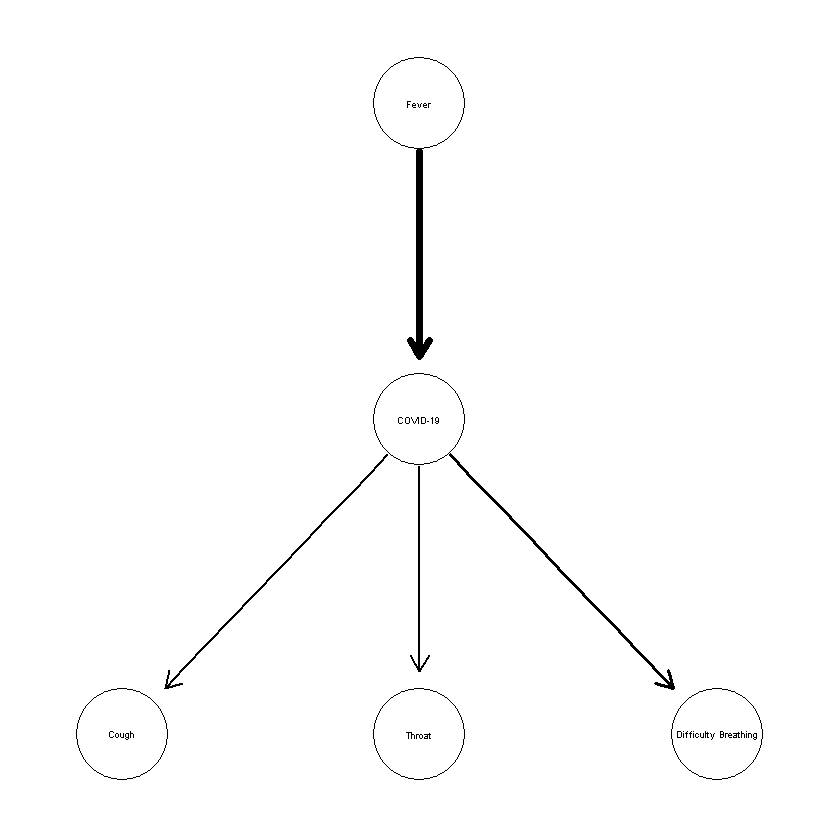

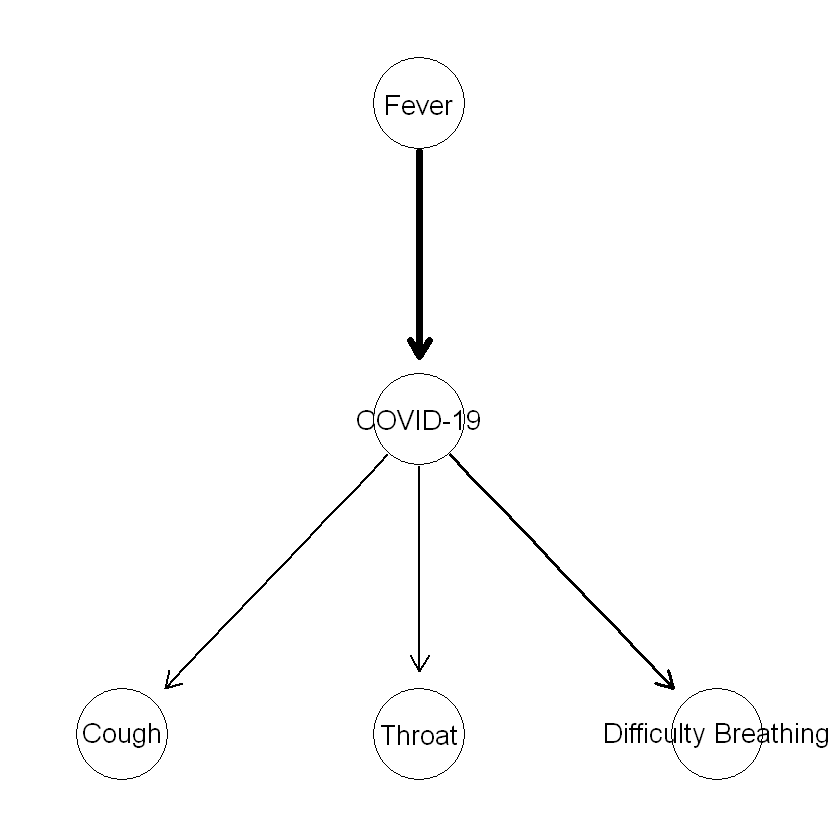

In [ ]:
# plot the network
g <- Rgraphviz::layoutGraph(strength.plot(bn,bns))
graph::nodeRenderInfo(g) <- list(fontsize=40)
Rgraphviz::renderGraph(g)